### Relax Inc. Marketing Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read users data file
users = pd.read_csv("takehome_users.csv", encoding = "ISO-8859-1")
users.shape

(12000, 10)

The data file contains 12000 users and 10 features to evaluate.

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [4]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
users.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

In [6]:
# rename object_id to user_id
users.columns = ['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id']

In [7]:
# Read users engagement data file
engagement = pd.read_csv("takehome_user_engagement.csv", index_col="time_stamp", parse_dates=["time_stamp"])
engagement.shape

(207917, 2)

In [8]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  207917 non-null  int64
 1   visited  207917 non-null  int64
dtypes: int64(2)
memory usage: 4.8 MB


In [9]:
engagement.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [10]:
# Find user's engagement in a 7-days window
engagement_7d = engagement.groupby('user_id').rolling('7D').visited.count()
user_7d_engagement = pd.DataFrame(engagement_7d)
user_7d_engagement = user_7d_engagement.rename(columns={"visited":"7 Days visit count"})
user_7d_engagement

7 Days visit count
user_id time_stamp                             
1       2014-04-22 03:53:30                 1.0
2       2013-11-15 03:45:04                 1.0
        2013-11-29 03:45:04                 1.0
        2013-12-09 03:45:04                 1.0
        2013-12-25 03:45:04                 1.0
...                                         ...
11996   2013-09-06 06:14:15                 1.0
11997   2013-01-15 18:28:37                 1.0
11998   2014-04-27 12:45:16                 1.0
11999   2012-06-02 11:55:59                 1.0
12000   2014-01-26 08:57:12                 1.0

[207917 rows x 1 columns]

In [11]:
# Find users who visited 3 days or more in a 7-days window
users_3visits_7days = pd.DataFrame((user_7d_engagement["7 Days visit count"].groupby("user_id").max() > 2).astype(int))
users_3visits_7days = users_3visits_7days.rename(columns={"7 Days visit count":"3visits_in_7days"})
users_3visits_7days.head(15)

,3visits_in_7days
user_id,
1,0
2,1
3,0
4,0
5,0
6,0
7,0
10,1
11,0


In [12]:
# Add the above finding to the users dataframe
users = pd.merge(users, users_3visits_7days, how="left", on='user_id')
users.head(15)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,3visits_in_7days
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,0.0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1.0


In [13]:
users.shape

(12000, 11)

In [14]:
users["3visits_in_7days"].fillna(0, inplace=True)
users.head(15)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,3visits_in_7days
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,0.0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,0.0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,0.0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1.0


In [15]:
# We will try to find the users who have logged into the product on three separate days  
# in at least one seven-day period.  We call these users adopted users.
adopted_users = users.loc[users["3visits_in_7days"] == 1]
adopted_users

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,3visits_in_7days
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1.0
19,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN,1.0
32,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0,1.0
41,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
11964,11965,2014-04-25 07:17:35,Storey Lewis,LewisStorey@cuvox.de,GUEST_INVITE,1.400657e+09,0,0,65,11251.0,1.0
11966,11967,2014-01-12 08:12:37,Barbosa Pedro,PedroFernandesBarbosa@gmail.com,GUEST_INVITE,1.401524e+09,0,0,15,5688.0,1.0
11968,11969,2013-06-01 00:48:14,Dickinson Aidan,AidanDickinson@hotmail.com,GUEST_INVITE,1.401411e+09,1,1,52,6647.0,1.0
11974,11975,2013-03-23 11:10:11,Daecher Jürgen,JurgenDaecher@gustr.com,GUEST_INVITE,1.400757e+09,1,0,31,6410.0,1.0


In [16]:
adopted_users.shape

(1602, 11)

In [17]:
non_adopted_users = users.loc[users["3visits_in_7days"] == 0]
non_adopted_users.shape

(10398, 11)

#### Exploratory Data Analysis

<AxesSubplot:xlabel='creation_source', ylabel='count'>

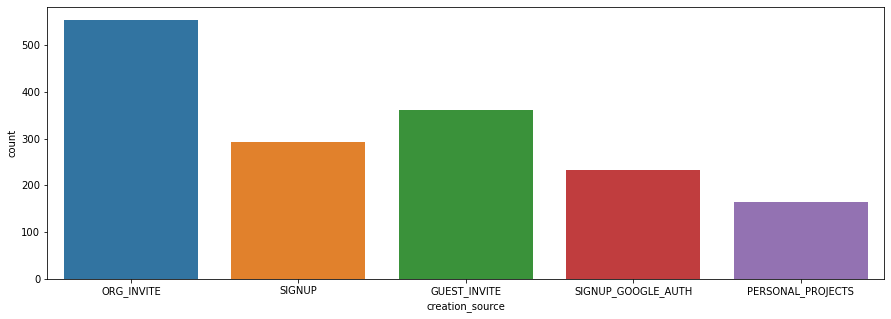

In [18]:
# Let's look at how the adopted users created their accounts.
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(x='creation_source', data=adopted_users)

<AxesSubplot:xlabel='creation_source', ylabel='count'>

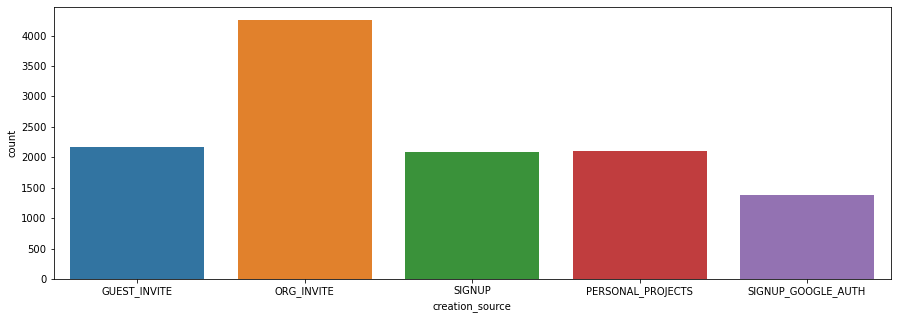

In [19]:
# Let's look at how all the users created their accounts.
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(x='creation_source', data=users)

In [20]:
# Number of organizations
num_org = users.org_id.unique()
len(num_org)

417

In [21]:
# Number of users in each organization
num_users_in_org = users.org_id.value_counts()
num_users_in_org

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
397      8
400      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [22]:
# Number of adopted users in each organization
num_adopted_users_in_org = adopted_users.org_id.value_counts()
num_adopted_users_in_org

7      16
4      16
2      15
1      14
9      14
       ..
386     1
244     1
323     1
315     1
125     1
Name: org_id, Length: 400, dtype: int64

Looks like those who got invited to an organization as a full member or a guest will have higher rate to become an adopted user.

<AxesSubplot:xlabel='enabled_for_marketing_drip', ylabel='count'>

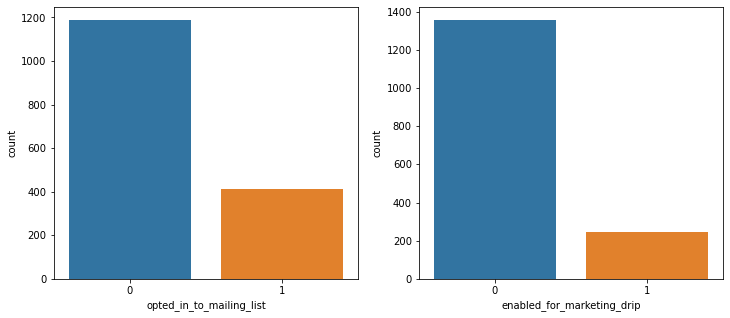

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(x='opted_in_to_mailing_list', data=adopted_users, ax=axes[0])
sns.countplot(x='enabled_for_marketing_drip', data=adopted_users, ax=axes[1])